## What is COVID-19?

> Coronaviruses are a large family of viruses that may cause respiratory illnesses in humans ranging from common colds to more severe conditions such as Severe Acute Respiratory Syndrome (SARS) and Middle Eastern Respiratory Syndrome (MERS).1
'Novel coronavirus' is a new, previously unidentified strain of coronavirus. The novel coronavirus involved in the current outbreak has been named SARS-CoV-2 by the World Health Organization (WHO). 3The disease it causes has been named “coronavirus disease 2019” (or “COVID-19”).`

![Coronavirus particle Image](https://www.apta.com/wp-content/uploads/home-banner-1.jpg)

## Notebook covers:


1. Data loading 
2. Data Cleaning and Preparation
3. Visualising N number of worst hit countries using [plotly](https://plotly.com/) scatter plot.
4. Plotting confirmed and death cases for the requested country.
5. Plotting all cases on world map using [Folium](https://python-visualization.github.io/folium/)
6. COVID-19: Progression of spread (Animation)
7. Visualizing covid19 worlwide scenario on [Calender Maps](https://pythonhosted.org/calmap/)


In [ ]:
# importing libraries

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets

In [ ]:
# loading data right from the source: John hopkins github repo
death_df = pd.read_csv('time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('cases_country.csv')

In [ ]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172


In [ ]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,558,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,654,682,688,694,705,714,715,727,742,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960,980,1001,1034,1039,1044,1055,1064,1077,1086,1114
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2841,2998,3058,3158,3271,3409,3507,3625,3746,3968,4062,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748,5894,6067,6218,6297,6453,6631,6717,6799,6951,7074,7255,7322,7420,7606,7735,7842,7943,8078,8196
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,550,568,576,596,604,615,617,624,628,639,639,652,653,653,663,676,676,681,684,692,694,698,733,735,738,741,741,744,751,757,759,780,781,781,781,789,789,791,792,792
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13,13,14,14,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,21,24,24,38,38,40,41,42,61,61,64,64,64,64,66


In [ ]:
death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491,504,546,548
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37,38,39,42
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,617,623,630,638,646,653,661,667,673,681,690,698,707,715,724,732,741,751,760,767,777,788,799,811,825
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,48,48,49,49,49,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,52,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,6,6,6,6,7,8,8


In [ ]:
country_df.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-06-20 08:33:20,-25.0000,133.0000,7436.0,102.0,6888.0,446.0,29.206943,NaN,NaN,1.371705,36,AUS
1,Austria,2020-06-20 08:33:20,47.5162,14.5501,17271.0,688.0,16141.0,442.0,191.763635,NaN,NaN,3.983556,40,AUT
2,Canada,2020-06-20 08:33:20,60.0010,-95.0010,102314.0,8408.0,64318.0,29588.0,270.273683,NaN,NaN,8.217839,124,CAN
3,China,2020-06-20 08:33:20,30.5928,114.3055,84524.0,4638.0,79529.0,357.0,6.017329,NaN,NaN,5.487199,156,CHN
4,Denmark,2020-06-20 08:33:20,56.2639,9.5018,12591.0,600.0,11482.0,509.0,217.378431,NaN,NaN,4.765309,208,DNK


In [ ]:
# data cleaning

# renaming the df column names to lowercase
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

# changing province/state to state and country/region to country
confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})
country_df.head()

,country,last_update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3
0,Australia,2020-06-20 08:33:20,-25.0000,133.0000,7436.0,102.0,6888.0,446.0,29.206943,NaN,NaN,1.371705,36,AUS
1,Austria,2020-06-20 08:33:20,47.5162,14.5501,17271.0,688.0,16141.0,442.0,191.763635,NaN,NaN,3.983556,40,AUT
2,Canada,2020-06-20 08:33:20,60.0010,-95.0010,102314.0,8408.0,64318.0,29588.0,270.273683,NaN,NaN,8.217839,124,CAN
3,China,2020-06-20 08:33:20,30.5928,114.3055,84524.0,4638.0,79529.0,357.0,6.017329,NaN,NaN,5.487199,156,CHN
4,Denmark,2020-06-20 08:33:20,56.2639,9.5018,12591.0,600.0,11482.0,509.0,217.378431,NaN,NaN,4.765309,208,DNK


In [ ]:
# total number of confirmed, death and recovered cases
confirmed_total = int(country_df['confirmed'].sum())
deaths_total = int(country_df['deaths'].sum())
recovered_total = int(country_df['recovered'].sum())
active_total = int(country_df['active'].sum())

In [ ]:
# displaying the total stats

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:30px; margin-left:20px;'> Recovered: " + str(recovered_total) + "</span>"+
             "</div>")
       )

# COVID-19 Confirmed/Death/Recovered cases by countries

## Enter number of countries you want the data for

In [ ]:
# sorting the values by confirmed descednding order
#country_df.sort_values('confirmed', ascending= False).head(10).style.background_gradient(cmap='copper')
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    r = 'background-color: red'
    y = 'background-color: purple'
    g = 'background-color: grey'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 4] = y
    df1.iloc[:, 5] = r
    df1.iloc[:, 6] = g
    
    return df1

def show_latest_cases(n):
    n = int(n)
    return country_df.sort_values('confirmed', ascending= False).head(n).style.apply(highlight_col, axis=None)

interact(show_latest_cases, n='10')

ipywLayout = widgets.Layout(border='solid 2px green')
#ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [ ]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False)

In [ ]:
fig = px.scatter(sorted_country_df.head(10), x="country", y="confirmed", size="confirmed", color="country",
               hover_name="country", size_max=60)
fig.update_layout(
    title=str(10) +" Worst hit countries",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    width = 700
    )
fig.show();


# Slide to check for the worst hit countries

In [ ]:
# # plotting the 20 worst hit countries

def bubble_chart(n):
    fig = px.scatter(sorted_country_df.head(n), x="country", y="confirmed", size="confirmed", color="country",
               hover_name="country", size_max=60)
    fig.update_layout(
    title=str(n) +" Worst hit countries",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    width = 700
    )
    fig.show();

#interact(bubble_chart, n=10)
#ipywLayout = widgets.Layout(border='solid 2px green')
#ipywLayout.display='none'
#widgets.VBox([fig], layout=ipywLayout)

In [ ]:


def plot_cases_of_a_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [confirmed_df, death_df]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ));
    
    fig.update_layout(
        title="COVID 19 cases of " + country,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 800,
        
    );
    
    fig.update_yaxes(type="linear")
    fig.show();
plot_cases_of_a_country('World')

In [ ]:
plot_cases_of_a_country('India')

In [ ]:
plot_cases_of_a_country('US')

# Check the details of any country or the World

* Enter the name of your country(in capitalized format(e.g. Italy)) and world for total cases

# 10 worst hit countries - Confirmed cases

In [ ]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "confirmed",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

# 10 worst hit countries - Death cases

In [ ]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "deaths",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

# Worst hit countries - Recovering cases

In [ ]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "recovered",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

# Global spread of COVID-19

In [ ]:

world_map = folium.Map(location=[11,0], tiles="cartodbpositron", zoom_start=2, max_zoom = 6, min_zoom = 2)


for i in range(0,len(confirmed_df)):
    folium.Circle(
        location=[confirmed_df.iloc[i]['lat'], confirmed_df.iloc[i]['long']],
        fill=True,
        radius=(int((np.log(confirmed_df.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='red',
        fill_color='indigo',
        tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+confirmed_df.iloc[i]['country'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed: "+str(confirmed_df.iloc[i,-1])+"</li>"+
                        "<li>Deaths:   "+str(death_df.iloc[i,-1])+"</li>"+
                        "<li>Death Rate: "+ str(np.round(death_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(world_map)

world_map


In [ ]:
from matplotlib import ticker 
import pycountry_convert as pc
import folium
import branca
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import json, requests
import calmap

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## COVID-19: Progression of spread

In [ ]:
data = pd.read_csv(r'covid_19_dataL.csv')
data.rename(columns = {'Last Update':'last_update'}, inplace = True)
d1 = data.groupby(['last_update', 'Country/Region'])['Confirmed', 'Deaths'].max().reset_index().fillna(0)
d1["last_update"] = pd.to_datetime( d1["last_update"]).dt.strftime('%m/%d/%Y')
#print(d1.head())
fig = px.scatter_geo(d1, locations="Country/Region", locationmode='country names', 
                     color=np.power(d1["Confirmed"],0.3)-2 , size= np.power(d1["Confirmed"]+1,0.3)-1, hover_name="Country/Region",
                     hover_data=["Confirmed"],
                     range_color= [0, max(np.power(d1["Confirmed"],0.3))], 
                     projection="natural earth", animation_frame="last_update", 
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='COVID-19: Progression of spread'
                    )
fig.update_coloraxes(colorscale="hot")
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [ ]:
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])
data = data.set_index('ObservationDate')
data.head()

,SNo,Province/State,Country/Region,last_update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-22,1,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,2,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22,3,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22,4,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,5,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## Plotting worldwide scenario on Calender maps

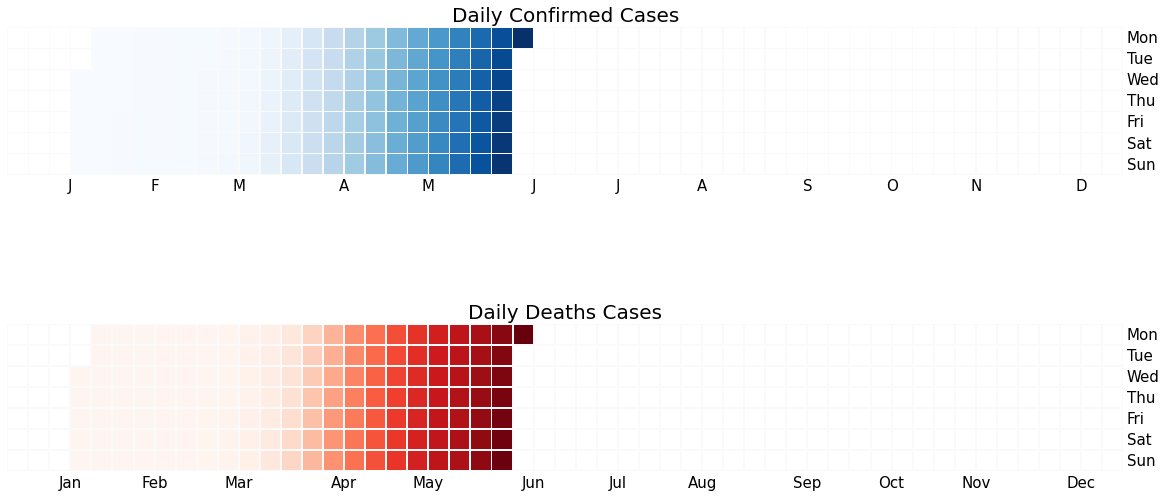

In [ ]:
f = plt.figure(figsize=(20,10))
f.add_subplot(2,1,1)
calmap.yearplot(data['Confirmed'], fillcolor='white', cmap='Blues', linewidth=0.5,linecolor="#fafafa",monthlabels=["J","F","M","A","M","J","J","A","S","O","N","D"])
plt.title("Daily Confirmed Cases",fontsize=20)
plt.tick_params(labelsize=15)

f.add_subplot(2,1,2)
calmap.yearplot(data['Deaths'], fillcolor='white', cmap='Reds', linewidth=1,linecolor="#fafafa",year=2020,)
plt.title("Daily Deaths Cases",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

## Symptoms:
People may be sick with the virus for 1 to 14 days before developing symptoms. The most common symptoms of coronavirus disease (COVID-19) are fever, tiredness, and dry cough. Most people (about 80%) recover from the disease without needing special treatment.
* cough
* fever
* tiredness
* difficulty in breathing(severe cases)


